In [2]:
import yfinance as yf

data = yf.download('BBRI.JK', '2024-03-14', '2024-03-18')

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_info = yf.Ticker('SSIA.JK')


In [7]:
stock_info.info['shortName']

'Surya Semesta Internusa Tbk'

In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-14,6225.0,6250.0,6075.0,6150.0,5869.504883,88145400
2024-03-15,5950.0,5950.0,5725.0,5800.0,5800.000000,144447600


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Mendownload data saham Tesla (TSLA) dari Yahoo Finance untuk 5 tahun terakhir
data = yf.download("BBRI.JK", start="2020-04-09", end="2023-12-01")

# Menampilkan lima baris pertama dari data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close   
Date                                                                          
2020-04-09  2599.955078  2645.408936  2499.956787  2536.319824  2127.575684  \
2020-04-13  2536.319824  2581.773682  2454.503174  2518.138428  2112.324707   
2020-04-14  2536.319824  2636.318115  2518.138428  2636.318115  2211.458740   
2020-04-15  2636.318115  2718.134766  2481.775391  2509.047607  2104.698730   
2020-04-16  2518.138428  2518.138428  2345.414062  2372.686279  1990.312866   

               Volume  
Date                   
2020-04-09  292370749  
2020-04-13  136106890  
2020-04-14  241711574  
2020-04-15  351010672  
2020-04-16  404530667  


In [44]:
data.reset_index(inplace=True)  # Mengembalikan indeks DataFrame ke kolom biasa
data = data[["Date", "Close"]]  # Memilih kolom "Date" dan "Close"
data = data.rename(columns={"Date": "ds", "Close": "y"})  # Menamai ulang kolom
data.head()


,ds,y
0,2020-04-09,2536.319824
1,2020-04-13,2518.138428
2,2020-04-14,2636.318115
3,2020-04-15,2509.047607
4,2020-04-16,2372.686279


In [45]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data  

18:03:18 - cmdstanpy - INFO - Chain [1] start processing
18:03:19 - cmdstanpy - INFO - Chain [1] done processing


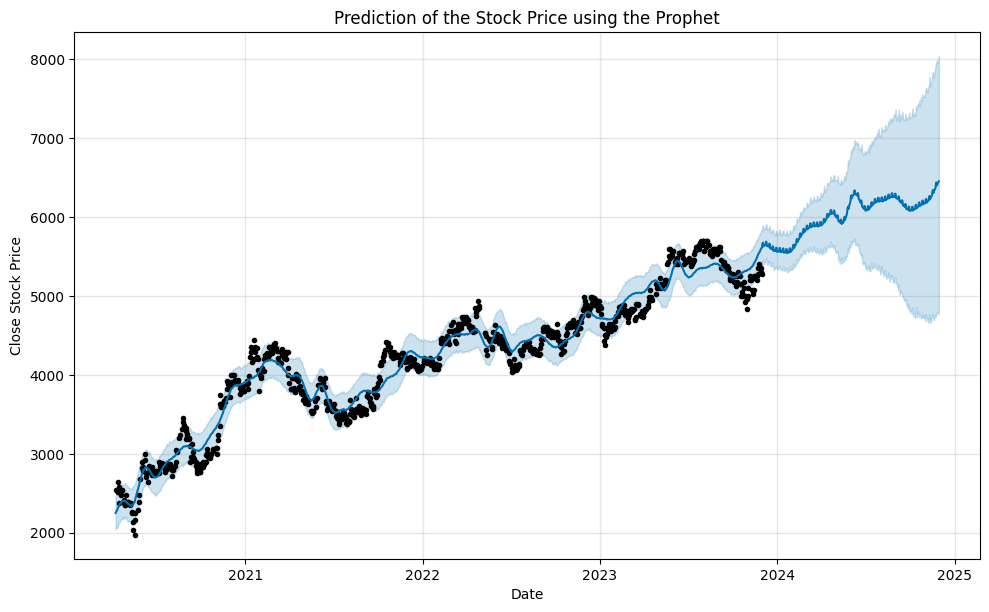

In [46]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

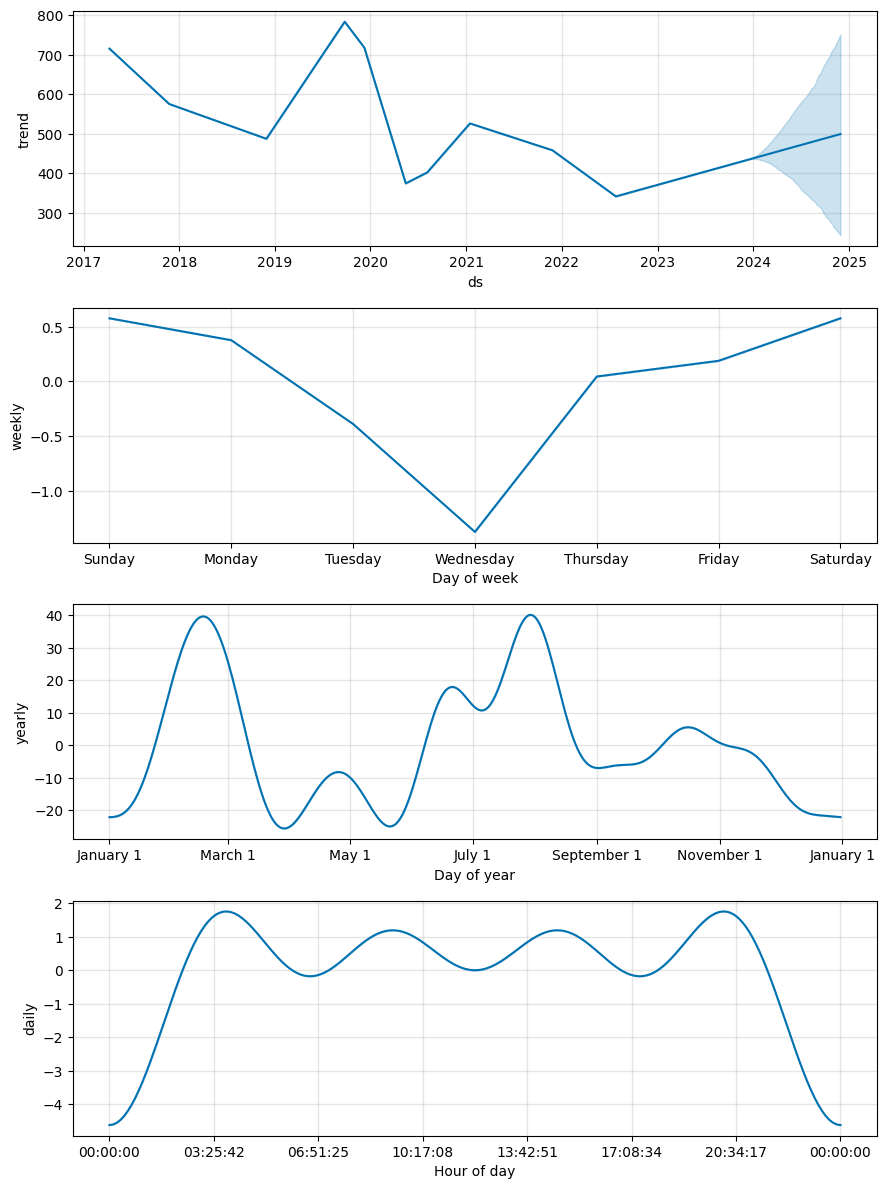

In [21]:
m.plot_components(prediction)
plt.show()